### **Pivot Table**

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.groupby(['sex', 'smoker'])['total_bill'].mean().unstack()


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [5]:
# pivot
# default agg function is mean
df.pivot_table(index='sex', columns='smoker', values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [6]:
df.pivot_table(index='sex', columns='smoker',
               values='total_bill', aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [7]:
# all cols together
df.pivot_table(index='sex', columns='smoker')


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [8]:
# multidimensional
df.pivot_table(index=['sex', 'smoker'], columns=[
               'day', 'time'], values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [9]:
df.pivot_table(index=['sex', 'smoker'], columns=[
               'day', 'time'])


size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [10]:
df.pivot_table(index=['sex', 'smoker'], columns=[
               'day', 'time'], aggfunc={'size': 'mean', 'tip': 'max', 'total_bill': 'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [11]:
# margins
df.pivot_table(index='sex', columns='smoker',
               values='total_bill', aggfunc='sum', margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [12]:
# plotting graphs
df = pd.read_csv('expense_data.csv')
df.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [13]:
df['Category'].value_counts()


Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [14]:
df.info()
# date is string


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [15]:
df['Date'] = pd.to_datetime(df['Date'])


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [17]:
df['month'] = df['Date'].dt.month_name()
df.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [18]:
df.pivot_table(index='month', columns='Category', values='INR', aggfunc='sum')


Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [19]:
# fill nan
df.pivot_table(index='month', columns='Category',
               values='INR', aggfunc='sum', fill_value=0)


Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


<AxesSubplot:xlabel='month'>

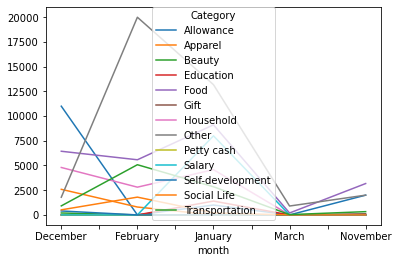

In [20]:
df.pivot_table(index='month', columns='Category',
               values='INR', aggfunc='sum', fill_value=0).plot()


<AxesSubplot:xlabel='month'>

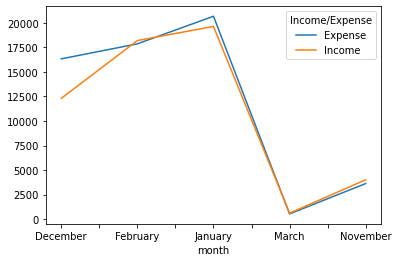

In [21]:
df.pivot_table(index='month', columns='Income/Expense',
               values='INR', aggfunc='sum', fill_value=0).plot()


<AxesSubplot:xlabel='month'>

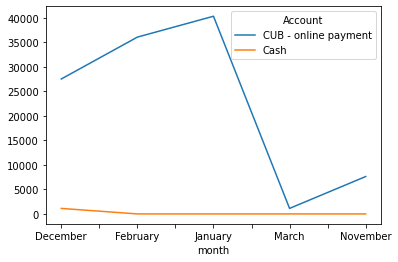

In [22]:
df.pivot_table(index='month', columns='Account',
               values='INR', aggfunc='sum', fill_value=0).plot()


In [26]:
# What are vectorized operations
a = np.array([1, 2, 3, 4])
a


array([1, 2, 3, 4])

In [27]:
# problem in vectorized operations in vanilla python
s = ['cat', None, 'rat']
[i.startwith('c') for i in s]
# not run in None value

AttributeError: 'str' object has no attribute 'startwith'

In [29]:
# how pandas solves this issue?

s = pd.Series(['cat', None, 'rat'])
s.str.startswith('c')

# fast and optimized


0     True
1     None
2    False
dtype: object

In [30]:
# import titanic
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# common functions
#1. lower/upper/capitalize/title
#2. len
#3. strip


In [32]:
# 1.
df['Name'].str.upper()


0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [33]:
# 1.
df['Name'].str.lower()


0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [34]:
# 1.title -> first word of every letter be uppercase
df['Name'].str.title()


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [37]:
# 2.len -> length of every name 
df['Name'].str.len()


0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [38]:
# finding maximum length of every name
df['Name'].str.len().max()


82

In [39]:
# find name
df['Name'][df['Name'].str.len() == 82]


307    Penasco y Castellana, Mrs. Victor de Satode (M...
Name: Name, dtype: object

In [40]:
# strip -> remove unusaual spaces
"       nitish      ".strip()


'nitish'

In [41]:
df['Name'].str.strip()


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [44]:
# split -> get
df['Name'].str.split(',')


0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [45]:
# extract surname
df['Name'].str.split(',').str.get(0)


0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [46]:
df['lastname'] = df['Name'].str.split(',').str.get(0)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [49]:
df['Name'].str.split(',').str.get(1).str.strip().str.split(' ')


0                                    [Mr., Owen, Harris]
1      [Mrs., John, Bradley, (Florence, Briggs, Thayer)]
2                                         [Miss., Laina]
3              [Mrs., Jacques, Heath, (Lily, May, Peel)]
4                                  [Mr., William, Henry]
                             ...                        
886                                       [Rev., Juozas]
887                             [Miss., Margaret, Edith]
888                  [Miss., Catherine, Helen, "Carrie"]
889                                  [Mr., Karl, Howell]
890                                       [Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [50]:
# split only Mr. not every space -> n=1 -> spilt only one time 
df['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n=1)


0                                 [Mr., Owen Harris]
1      [Mrs., John Bradley (Florence Briggs Thayer)]
2                                     [Miss., Laina]
3              [Mrs., Jacques Heath (Lily May Peel)]
4                               [Mr., William Henry]
                           ...                      
886                                   [Rev., Juozas]
887                          [Miss., Margaret Edith]
888                [Miss., Catherine Helen "Carrie"]
889                               [Mr., Karl Howell]
890                                   [Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [51]:
# expand -> series into dataframe
df['Name'].str.split(',').str.get(
    1).str.strip().str.split(' ', n=1, expand=True)


,0,1
0,Mr.,Owen Harris
1,Mrs.,John Bradley (Florence Briggs Thayer)
2,Miss.,Laina
3,Mrs.,Jacques Heath (Lily May Peel)
4,Mr.,William Henry
...,...,...
886,Rev.,Juozas
887,Miss.,Margaret Edith
888,Miss.,"Catherine Helen ""Carrie"""
889,Mr.,Karl Howell


In [56]:
df[['title', 'firstname']] = df['Name'].str.split(',').str.get(
    1).str.strip().str.split(' ', n=1, expand=True)


In [53]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [54]:
df['title'].value_counts()


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

In [57]:
# replaced
df['title'] = df['title'].str.replace('Ms.', 'Miss.')
df['title'] = df['title'].str.replace('Mlle.', 'Miss.')


C:\Users\dhanr\AppData\Local\Temp\ipykernel_17144\2850676008.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Ms.', 'Miss.')
C:\Users\dhanr\AppData\Local\Temp\ipykernel_17144\2850676008.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Mlle.', 'Miss.')


In [58]:
df['title'].value_counts()


Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: title, dtype: int64

In [60]:
# filtering -> startwith / endswith
df['firstname'][df['firstname'].str.startswith('A')]


13            Anders Johan
22            Anna "Annie"
35         Alexander Oskar
38           Augusta Maria
61                  Amelie
              ...         
842                Augusta
845                Anthony
866               Asuncion
875    Adele Kiamie "Jane"
876          Alfred Ossian
Name: firstname, Length: 95, dtype: object

In [61]:
df['firstname'][df['firstname'].str.endswith('A')]


64     Albert A
303      Nora A
Name: firstname, dtype: object

In [62]:
# isdigit/isalpha

df['firstname'][df['firstname'].str.isdigit()]


Series([], Name: firstname, dtype: object)

In [65]:
# applying regex
# searching john -> both case in firstname columns
# case = False (allow uppercase and lowercase)
df['firstname'][df['firstname'].str.contains('john', case=False)]


1            John Bradley (Florence Briggs Thayer)
41     William John Robert (Dorothy Ann Wonnacott)
45                                    William John
98                         John T (Ada Julia Bone)
112                                     David John
117                            William John Robert
160                                  John Hatfield
162                                    John Viktor
165                   Frank John William "Frankie"
168                                         John D
188                                           John
212                                     John Henry
226                                   William John
227                            John Hall ("Henry")
324                                 George John Jr
328                 Frank John (Emily Alice Brown)
401                                           John
418                                   William John
467                                John Montgomery
527                            

In [68]:
# find lastnames with start and end char vowel
df['lastname'][df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]


30          Uruchurtu
49     Arnold-Franchi
207          Albimona
210               Ali
353    Arnold-Franchi
493      Artagaveytia
518             Angle
784               Ali
840          Alhomaki
Name: lastname, dtype: object

In [69]:
# find lastnames with start and end char not
df['lastname'][df['lastname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]


0         Braund
1        Cumings
2      Heikkinen
5          Moran
6       McCarthy
         ...    
884     Sutehall
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: lastname, Length: 671, dtype: object

In [70]:
# slicing
# firt 4 character of every name
df['Name'].str[:4]


0      Brau
1      Cumi
2      Heik
3      Futr
4      Alle
       ... 
886    Mont
887    Grah
888    John
889    Behr
890    Dool
Name: Name, Length: 891, dtype: object

In [71]:
df['Name'].str[::2]


0                    Ban,M.Oe ars
1      Cmns r.Jh rde Foec rgsTae)
2                     Hiknn is an
3          Ftel,Ms aqe et Ll a el
4                    Aln r ila er
                  ...            
886                   Mnvl,Rv uzs
887                Gaa,Ms.Mrae dt
888          Jhso,Ms.CteieHln"are
889                   Bh,M.Kr oel
890                    Doe,M.Ptik
Name: Name, Length: 891, dtype: object

In [72]:
# reverse
df['Name'].str[::-1]


0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object